# Atlas notebooks

***

> This notebook is an extension of the `regional-scatter-plots_R.ipynb` notebook (available in the same repository https://github.com/IPCC-WG1/Atlas/notebooks/) which provides a clear demonstration of the specific steps and parameters required to accurately replicate **Figure Atlas. 17** of the AR6-WGI Atlas Chapter. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)
>
> To cite this notebook please refere to the main notebook: `regional-scatter-plots_R.ipynb`

## Computing and visualizing regional climate change (temperature vs precipitation) for reference regions: Figure Atlas.17

24/6/2021

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

This notebook reproduces **Figure Atlas.17** of the AR6-WGI Atlas chapter. This is, the scatter plots of the regional climate change temperature vs. precipitation using CMIP5, CMIP6 and CORDEX datasets. This notebook builds on other sections of the repository: 1) auxiliary scripts from [reproducibility](https://github.com/IPCC-WG1/Atlas/tree/main/reproducibility), and 2) CMIP5/6 - CORDEX [aggregated datasets](https://github.com/IPCC-WG1/Atlas/tree/main/datasets-aggregated-regionally) for the WGI reference regions.

The legend and axis label information of the panels generated here is the one shown in the AR6-WGI Atlas chapter figures. The first column shows the annual temperature delta changes. The second and third columns, the scatterplots of the seasonal temperature and precipitation changes. Each row corresponds to a different reference region or, as in this case, to global results (World).

Before starting, the size of the graphic space of this notebook is defined to generate figures of an appropriate size:

In [1]:
library(repr)
# Change plot size 
options(repr.plot.width=14, repr.plot.height=18)

### Easy and direct production of the figure

#### Load packages and functions
This notebook is based on the R programming language and requires packages:

 * `magrittr` to pipe (`%>%`) sequences of operations
 * `httr` to handle URLs and HTTP
 * `lattice` and `latticeExtra` to produce the figures
 * `gridExtra` to produce the final panel of plots

In [2]:
library(magrittr)
library(httr)
library(lattice)
library(latticeExtra)
library(gridExtra)

The main function to generate the boxplots and scatterplots is `computeFigures`, which internally uses functions `computeDeltas` and `computeOffset`, all available in this repository. To load these functions in the working environment use the `source` R base function as follows.

In [3]:
source("../datasets-aggregated-regionally/scripts/computeDeltas.R")
source("../datasets-aggregated-regionally/scripts/computeFigures.R")
source("../datasets-aggregated-regionally/scripts/computeOffset.R")

#### Parameter setting 

We define the parameters:
- The seasons to show in the Precipitation vs Temperature scatterplots (E.g. 1:12 for annual and c(12, 1, 2) for the boreal winter)
- The baseline period (e.g. AR6 reference period 1995-2014). Available years in the datasets are 1850-1900 and 1950-2100.
- The area, i.e. "land", "sea" or "landsea"
- The reference regions (see reference-regions in this repository). Use `world` to generate global results.
- Select a CORDEX domain from the following options: SAM, CAM, NAM, AFR, WAS, EAS, AUS, ANT, ARC, SEA and EUR (use FALSE to exclude CORDEX)
- Figure axes ranges (ylim for temperature, xlim for precipitation percentage). Use `y <- NULL` and `x <- NULL` for automatic axes ranges.

This is the parameter setting for reproducing the first part of **Figure Atlas. 17**:

In [4]:
scatter.seasons <- list(c(12, 1, 2), 6:8)
ref.period <- 1995:2014
area <- "land"
regions <- c("WCA","TIB", "ARP", "SAS") 
cordex.domain <- "WAS"
ylim <- NULL
xlim <- NULL

#### Compute delta changes and figures

We are ready to apply the `computeFigures` function.

In [5]:
fig1 <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2023-06-27 11:23:22] Computing annual delta changes for the Boxplot of region WCA

[2023-06-27 11:23:22] Computing CMIP5..

[2023-06-27 11:23:25] Computing CMIP6..

[2023-06-27 11:23:29] Computing CORDEX..

[2023-06-27 11:24:01] Computing seasonal delta changes for the Scatterplots of region WCA

[2023-06-27 11:24:01] Computing CMIP5..

[2023-06-27 11:24:10] Computing CMIP6..

[2023-06-27 11:24:21] Computing CORDEX..

[2023-06-27 11:24:31] Computing annual delta changes for the Boxplot of region TIB

[2023-06-27 11:24:31] Computing CMIP5..

[2023-06-27 11:24:34] Computing CMIP6..

[2023-06-27 11:24:37] Computing CORDEX..

[2023-06-27 11:25:09] Computing seasonal delta changes for the Scatterplots of region TIB

[2023-06-27 11:25:09] Computing CMIP5..

[2023-06-27 11:25:18] Computing CMIP6..

[2023-06-27 11:25:29] Computing CORDEX..

[2023-06-27 11:25:39] Computing annual delta changes for the Boxplot of region ARP

[2023-06-27 11:25:39] Computing CMIP5..

[2023-06-27 11:25:42] Computi

The output of the above call (`fig1`) is a list of `trellis` class objects that can be easily arranged and displayed using the `grid.arrange` function from the `gridExtra` library.

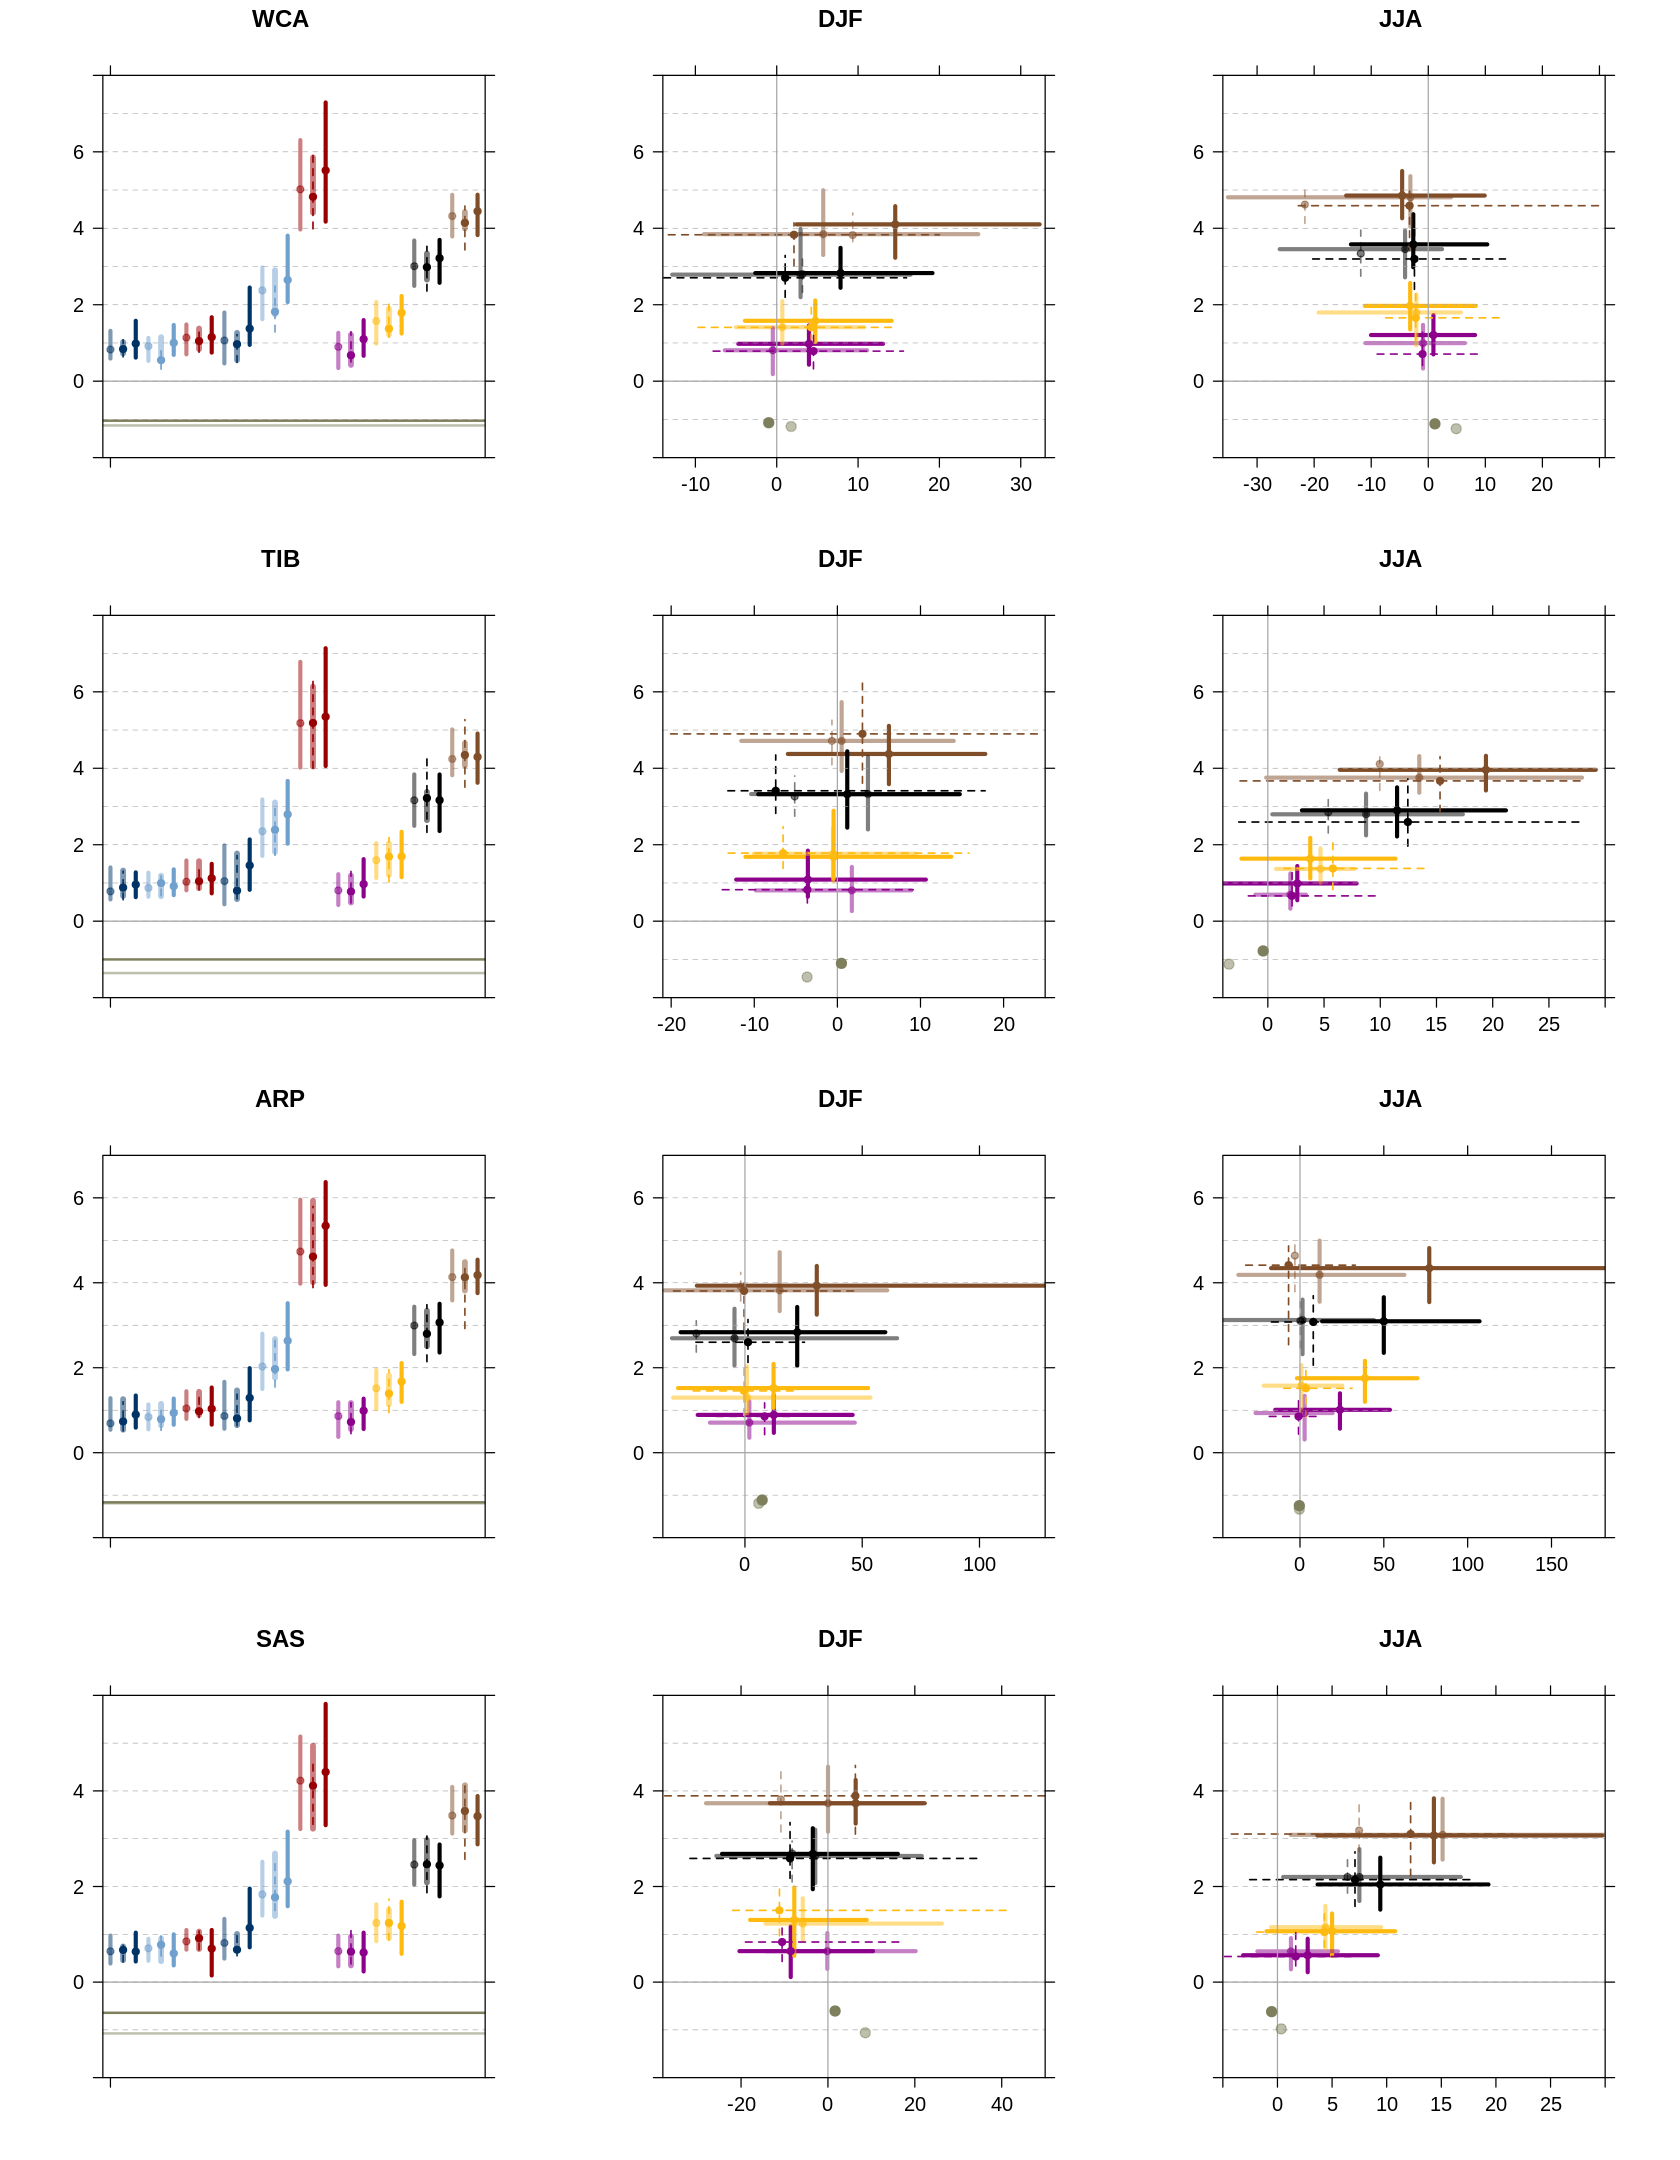

In [6]:
do.call("grid.arrange", fig1)

The legend and axis label information of these panels is the one shown in the AR6-WGI Atlas chapter figures. The first column shows the annual temperature delta changes. The second and third columns, the scatterplots of the seasonal temperature and precipitation changes. Each row corresponds to a different reference region. The legend is also available in this repository as a `png` file under the [notebooks/auxiliary-material]((https://github.com/IPCC-WG1/Atlas/tree/main/notebooks/auxiliary-material) folder:

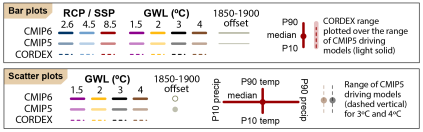


We can now export the Figure as PDF. There are other export options such as `png` (type `?pdf` for help). The `Cairo` package provides other export options. 

In [7]:
outfilename <- sprintf("ATvsAP_%s_%s_cordex:%s_baseperiod:%s.pdf",
  paste(regions, collapse = "-"), area, cordex.domain, paste(range(ref.period), collapse = "-")
)

pdf(outfilename, width = (length(scatter.seasons)+1)*5*0.85, height = length(regions)*5*0.95)
  do.call("grid.arrange", fig1)
dev.off()

png 
  2

We repeat the operation for each of the CORDEX domain and corresponding reference regions:

In [8]:
regions <- c("ECA", "EAS")
cordex.domain <- "EAS"

In [9]:
fig2 <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2023-06-27 11:27:58] Computing annual delta changes for the Boxplot of region ECA

[2023-06-27 11:27:58] Computing CMIP5..

[2023-06-27 11:28:01] Computing CMIP6..

[2023-06-27 11:28:05] Computing CORDEX..

[2023-06-27 11:28:36] Computing seasonal delta changes for the Scatterplots of region ECA

[2023-06-27 11:28:36] Computing CMIP5..

[2023-06-27 11:28:46] Computing CMIP6..

[2023-06-27 11:28:57] Computing CORDEX..

[2023-06-27 11:29:06] Computing annual delta changes for the Boxplot of region EAS

[2023-06-27 11:29:06] Computing CMIP5..

[2023-06-27 11:29:09] Computing CMIP6..

[2023-06-27 11:29:13] Computing CORDEX..

[2023-06-27 11:29:44] Computing seasonal delta changes for the Scatterplots of region EAS

[2023-06-27 11:29:44] Computing CMIP5..

[2023-06-27 11:29:54] Computing CMIP6..

[2023-06-27 11:30:05] Computing CORDEX..



In [10]:
regions <- c("SEA")
cordex.domain <- "SEA"

In [11]:
fig3 <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2023-06-27 11:30:14] Computing annual delta changes for the Boxplot of region SEA

[2023-06-27 11:30:14] Computing CMIP5..

[2023-06-27 11:30:17] Computing CMIP6..

[2023-06-27 11:30:21] Computing CORDEX..

[2023-06-27 11:30:52] Computing seasonal delta changes for the Scatterplots of region SEA

[2023-06-27 11:30:52] Computing CMIP5..

[2023-06-27 11:31:02] Computing CMIP6..

[2023-06-27 11:31:13] Computing CORDEX..



In [12]:
regions <- c("EEU","WSB","ESB","RFE", "WCA", "ECA") 
cordex.domain <- FALSE

In [13]:
fig4 <- computeFigures(regions = regions,
                      cordex.domain = cordex.domain,
                      area = area, 
                      ref.period = ref.period, 
                      scatter.seasons = scatter.seasons,
                      xlim = xlim,
                      ylim = ylim)

[2023-06-27 11:31:21] Computing annual delta changes for the Boxplot of region EEU

[2023-06-27 11:31:21] Computing CMIP5..

[2023-06-27 11:31:24] Computing CMIP6..

[2023-06-27 11:31:28] Computing CORDEX..

[2023-06-27 11:31:57] Computing seasonal delta changes for the Scatterplots of region EEU

[2023-06-27 11:31:57] Computing CMIP5..

[2023-06-27 11:32:07] Computing CMIP6..

[2023-06-27 11:32:19] Computing CORDEX..

[2023-06-27 11:32:26] Computing annual delta changes for the Boxplot of region WSB

[2023-06-27 11:32:26] Computing CMIP5..

[2023-06-27 11:32:29] Computing CMIP6..

[2023-06-27 11:32:32] Computing CORDEX..

[2023-06-27 11:33:02] Computing seasonal delta changes for the Scatterplots of region WSB

[2023-06-27 11:33:02] Computing CMIP5..

[2023-06-27 11:33:12] Computing CMIP6..

[2023-06-27 11:33:23] Computing CORDEX..

[2023-06-27 11:33:32] Computing annual delta changes for the Boxplot of region ESB

[2023-06-27 11:33:32] Computing CMIP5..

[2023-06-27 11:33:35] Computi

In [20]:
# Change plot size
options(repr.plot.width=14, repr.plot.height=8)

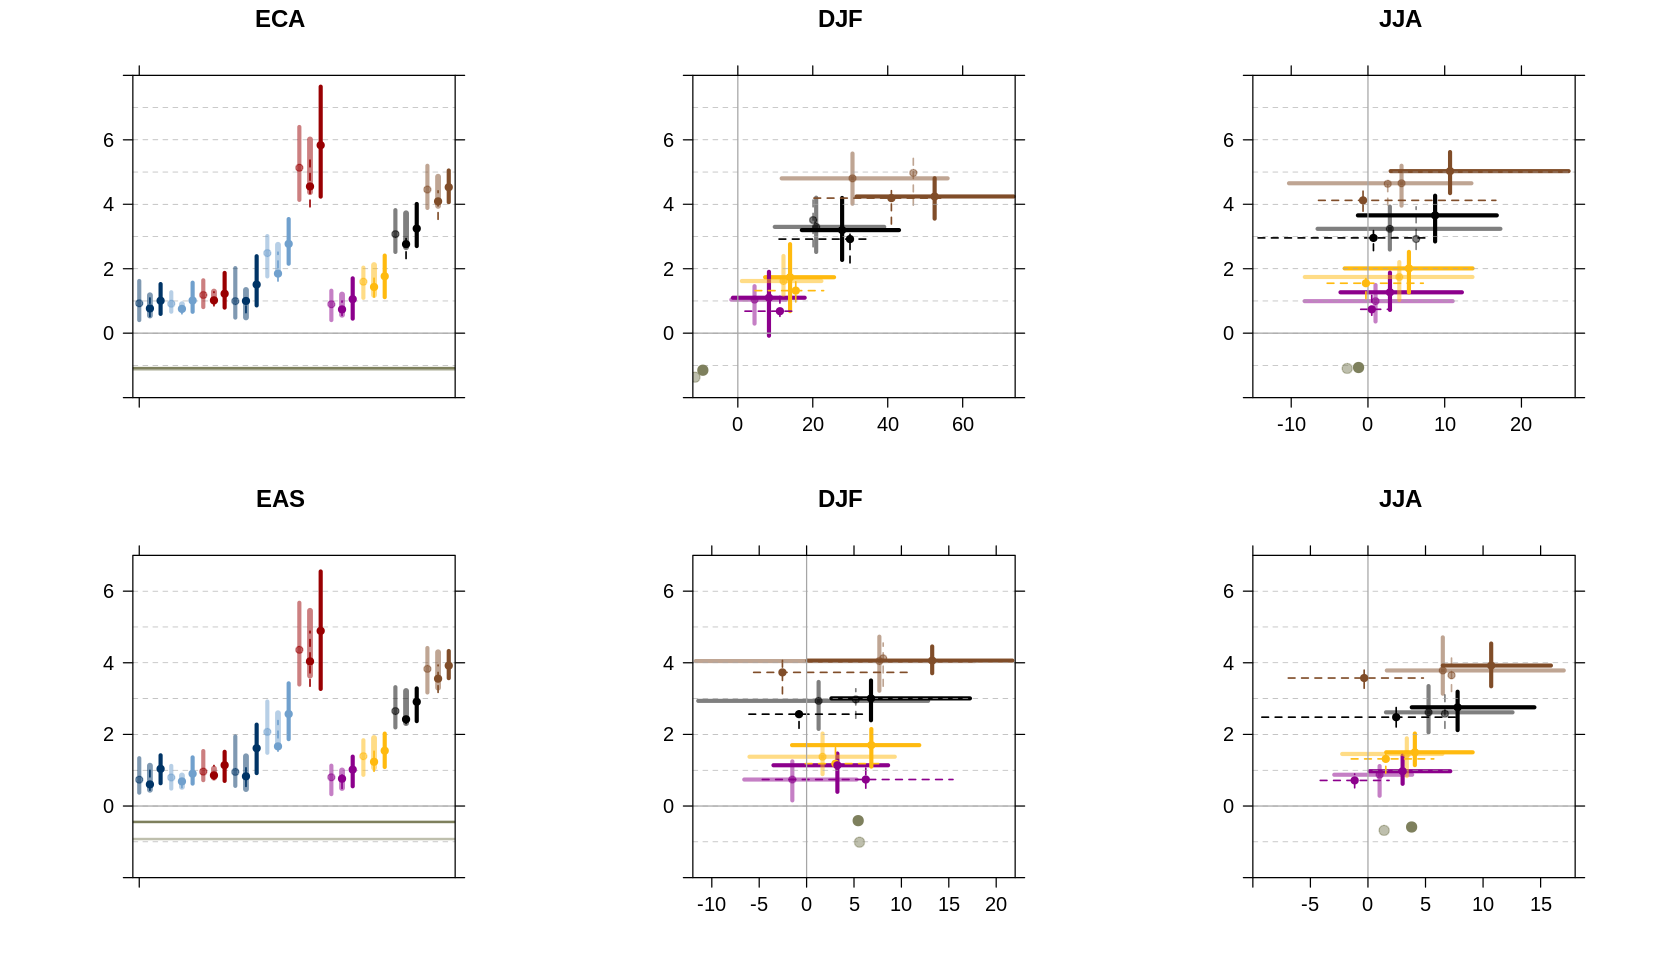

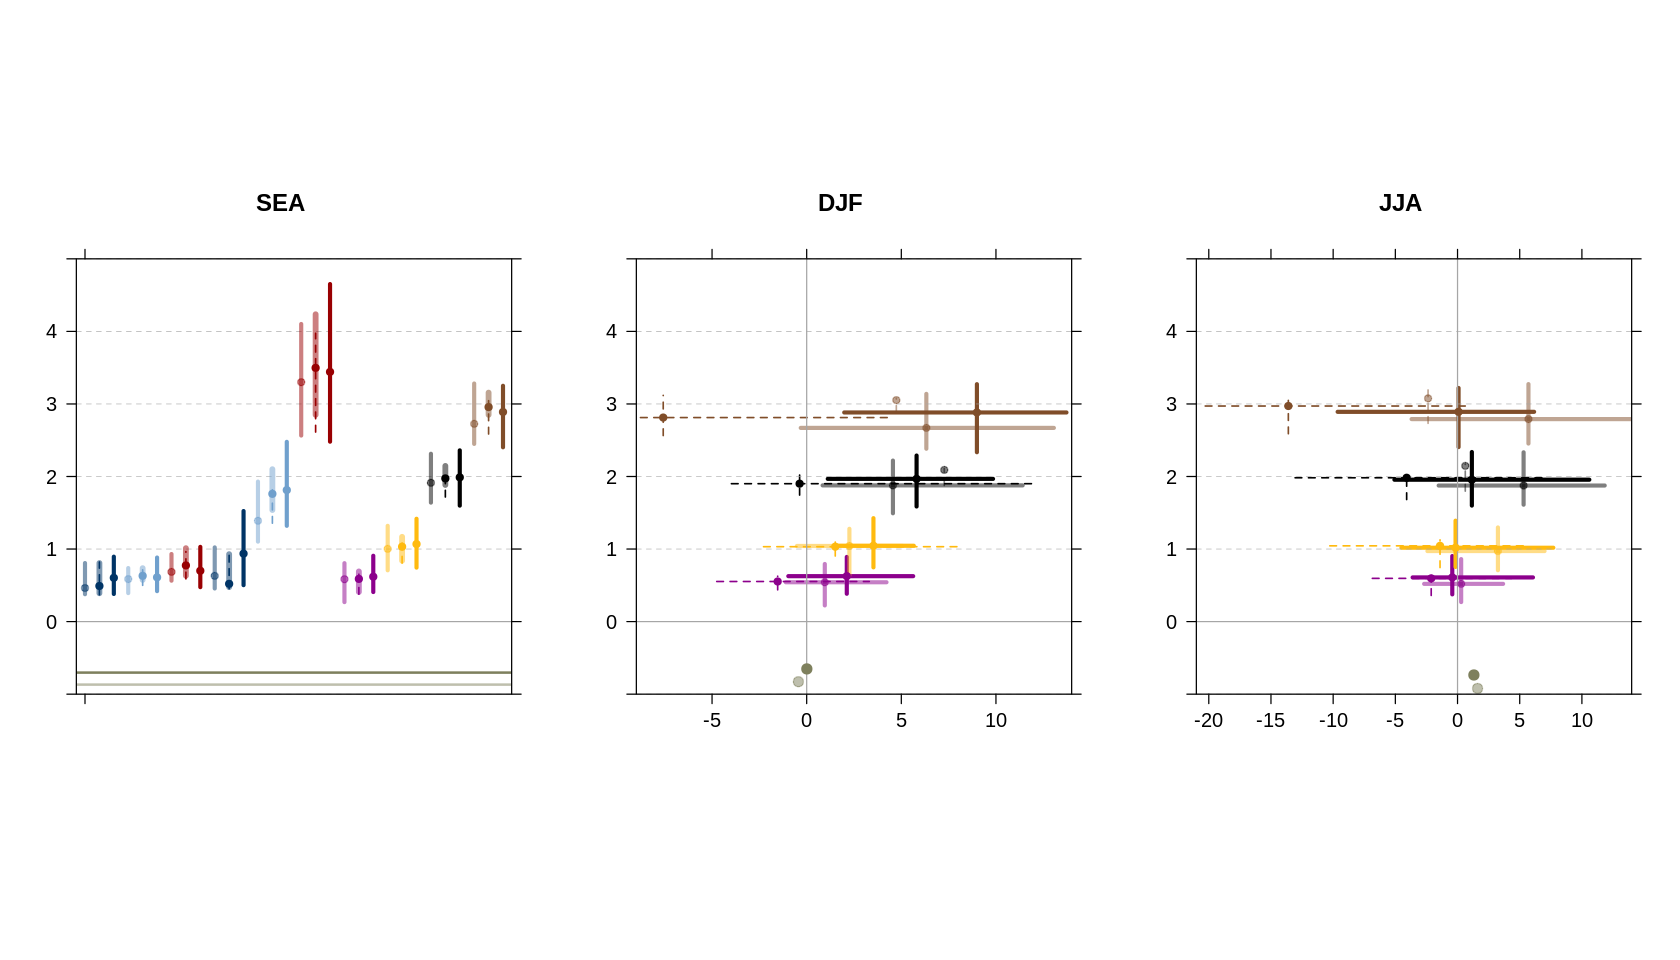

In [21]:
do.call("grid.arrange", fig2)
do.call("grid.arrange", fig3)

In [18]:
# Change plot size to 4 x 3
options(repr.plot.width=14, repr.plot.height=32)

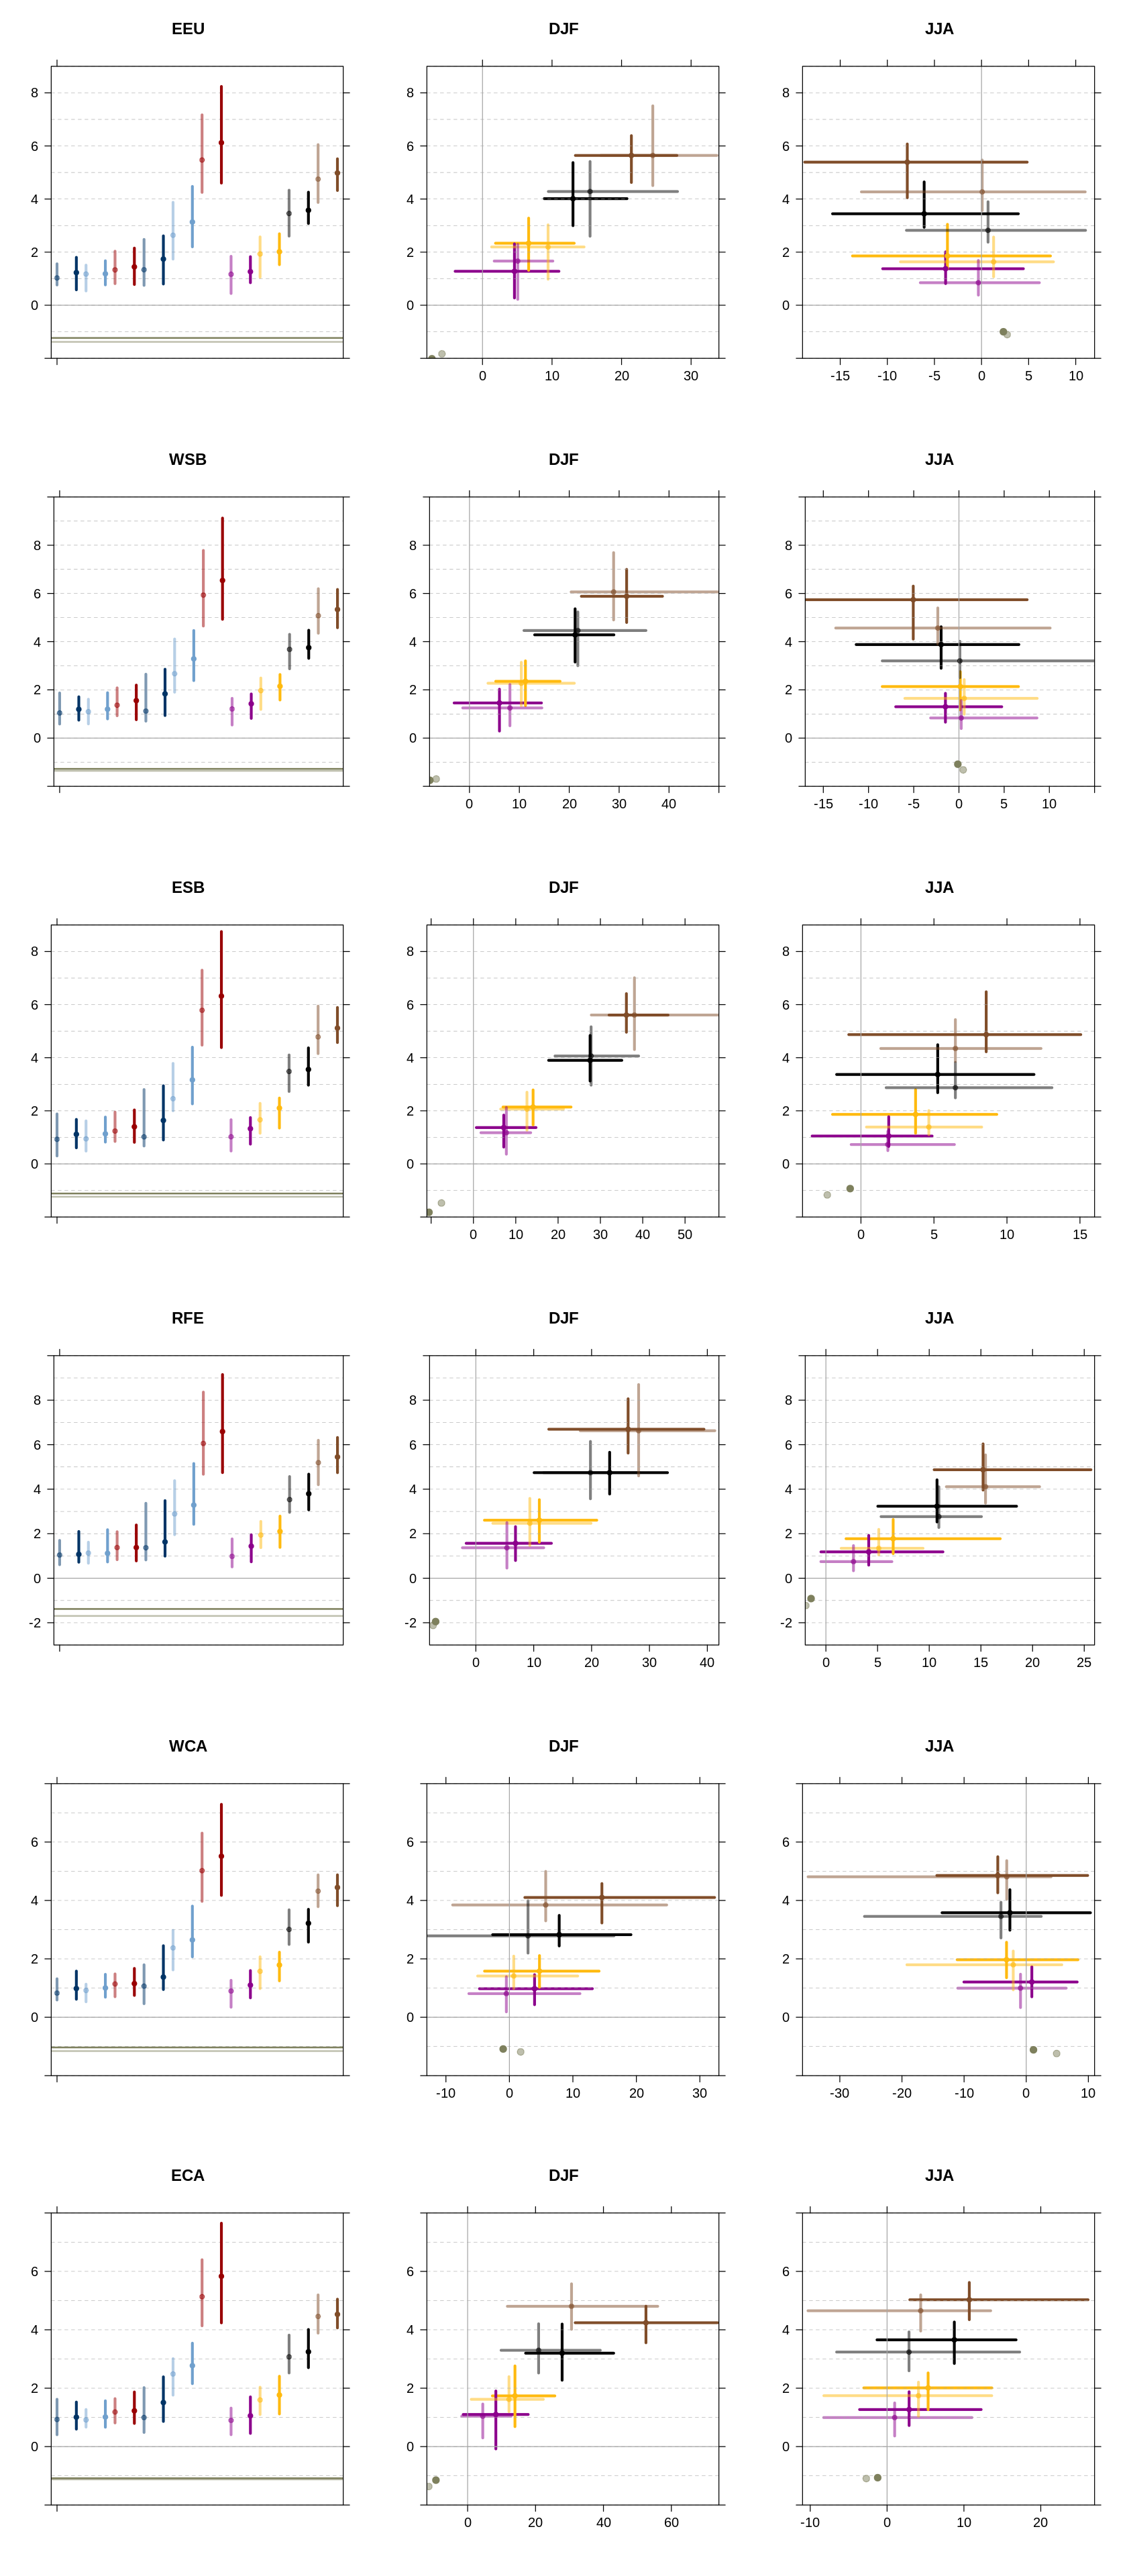

In [19]:
do.call("grid.arrange", fig4)

### Session Information

In [15]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/maialen/miniconda3/envs/Atlas/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gridExtra_2.3       latticeExtra_0.6-29 lattice_0.20-44    
[4] httr_1.4.2          magrittr_2.0.1      repr_1.1.3         

loaded via a namespace (and not attached):
 [1] uuid_0.1-4         R6_2.5.0           jpeg_0.1-8.1       rlang_0.4.11      
 [5] fansi_0.4.2        tools_3.6.3        grid_3.6